In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Dataset .csv')

In [2]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df2 = df.dropna(how='any')

In [6]:
df2.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# EDA

In [7]:
#group by city and calculate average cost
df2.groupby("City")["Average Cost for two"].mean()

City
Abu Dhabi           182.000000
Agra               1065.000000
Ahmedabad           857.142857
Albany               22.647059
Allahabad           517.500000
                      ...     
Weirton              25.000000
Wellington City      71.250000
Winchester Bay       25.000000
Yorkton              25.000000
��stanbul            81.428571
Name: Average Cost for two, Length: 140, dtype: float64

In [8]:
df2.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False)

City
Jakarta           308437.500000
Tangerang         250000.000000
Bogor             160000.000000
Bandung           150000.000000
Pasay City          3333.333333
                      ...      
Fernley               10.000000
Vernonia              10.000000
Lakes Entrance         7.000000
Dicky Beach            7.000000
Inverloch              7.000000
Name: Average Cost for two, Length: 140, dtype: float64

Text(0, 0.5, 'amount')

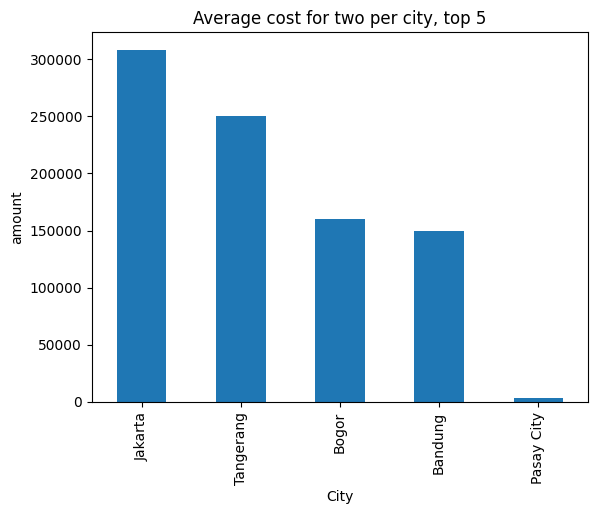

In [9]:

df2.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Average cost for two per city, top 5")
plt.xlabel("City")
plt.ylabel("amount")

In [10]:
# Cuisines totla number of votes
data = df2.groupby("Cuisines")["Votes"].sum().reset_index()

In [11]:
data[data["Votes"] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


In [12]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

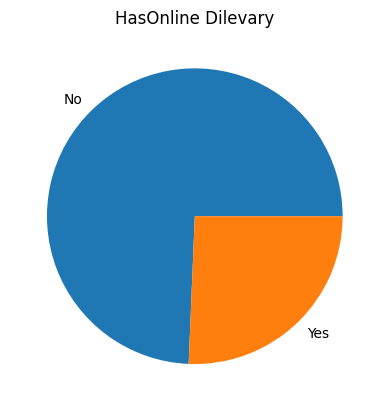

In [13]:
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("HasOnline Dilevary")
plt.ylabel("")
plt.show()

In [14]:
df[["Aggregate rating","Rating text"]].sort_values(by="Aggregate rating",ascending=True).head(3000)

,Aggregate rating,Rating text
2204,0.0,Not rated
78,0.0,Not rated
77,0.0,Not rated
69,0.0,Not rated
6953,0.0,Not rated
...,...,...
7647,2.8,Average
7646,2.8,Average
7896,2.8,Average
5985,2.8,Average


In [15]:
df = df[df["Rating text"] !="Not rated"]

<Axes: ylabel='count'>

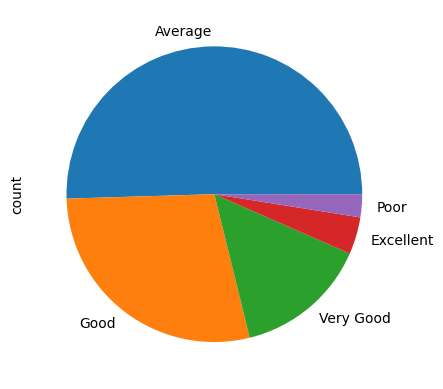

In [16]:
df["Rating text"].value_counts().plot(kind="pie")

# modelling

In [17]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [18]:
x = df[["Average Cost for two","Has Table booking","Has Online delivery","Price range"]]

In [19]:
y = df[["Aggregate rating"]]

In [20]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [21]:
y

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8
...,...
9546,4.1
9547,4.2
9548,3.7
9549,4.0


# changing into numerical values

In [22]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [23]:
x["Has Table booking"] = labelencoder.fit_transform(x["Has Table booking"])

C:\Users\Basavaraj M\AppData\Local\Temp\ipykernel_19008\3990998020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Has Table booking"] = labelencoder.fit_transform(x["Has Table booking"])


In [24]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [25]:
# table booking 0 is no , 1 is yes
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [26]:
x["Has Online delivery"] = labelencoder.fit_transform(x["Has Online delivery"])

C:\Users\Basavaraj M\AppData\Local\Temp\ipykernel_19008\2857882153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Has Online delivery"] = labelencoder.fit_transform(x["Has Online delivery"])


In [27]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [28]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
x = scaler.fit_transform(x)

In [31]:
x

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

# # train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
def modelresults(predictions):
    print("mean absulete error is {}".format(mean_absolute_error(y_test,predictions)))
    print("root mean squred error is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

# Linear regression

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
predictionsfromlr = lr.predict(x_test)

In [39]:
modelresults(predictionsfromlr) # error values

mean absulete error is 0.4019290083222994
root mean squred error is 0.5092576228413462


In [40]:
predictionsfromlr # predicted values or ratings

array([[3.22245268],
       [3.22245268],
       [3.48450093],
       ...,
       [3.85786935],
       [3.1610932 ],
       [3.22217109]])

# Grid search Cv

In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [42]:
svmodel = SVR()

In [43]:
param_gridsvr = {"C" :[0.1,0.5],"kernel" :["linear","poly"],"degree" :[2]}

In [44]:
gridsvr = GridSearchCV(svmodel,param_gridsvr)
gridsvr.fit(x_train,y_train)

C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [45]:
predsgridsvr = gridsvr.predict(x_test)

In [46]:
modelresults(predsgridsvr)

mean absulete error is 0.39663893793978455
root mean squred error is 0.5102329060504723


# Decision tree

In [47]:
# decision tree
from sklearn.tree import DecisionTreeRegressor

In [48]:
#parameters for this
param_grid = {
    "max_depth" : [10,30],
    "min_samples_leaf" : [1,2],
    "min_samples_split" : [2,5]
}

In [49]:
treemodel = DecisionTreeRegressor()

In [50]:
grid_tree = GridSearchCV(estimator = treemodel, param_grid = param_grid)

In [51]:
#train our model like
grid_tree.fit(x_train,y_train)

C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [52]:
treepredictions = grid_tree.predict(x_test)

In [53]:
modelresults(treepredictions)

mean absulete error is 0.3654756664972131
root mean squred error is 0.4664001634900827


# Random forest

In [54]:
# another tree based model randomforest model
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfrmodel = RandomForestRegressor()

In [56]:
param_gridrfr = {
    "max_depth" :[5,15],
    "n_estimators" : [2,5,10]
}

In [57]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [58]:
gridrfr.fit(x_train,y_train)

C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [59]:
randomforestpredictions = gridrfr.predict(x_test)

In [60]:
modelresults(randomforestpredictions)

mean absulete error is 0.365885537939802
root mean squred error is 0.4644913534841762


In [61]:
# we are going with decision tree 'no seeblow its changed'
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

# knn algorithm

In [62]:
# lets train KNN regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_param_grid = {"n_neighbors":[17,18,20]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [63]:
knn_grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [17, 18, 20]})

In [64]:
knnpreds = knn_grid_search.predict(x_test)

In [65]:
modelresults(knnpreds)

mean absulete error is 0.37531735313977044
root mean squred error is 0.47332844945856223


In [66]:
knn_grid_search.best_params_

{'n_neighbors': 20}

# adaboostregression

In [67]:
# try with adaboost regressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {
    "n_estimators" : [50, 100, 200],
    "learning_rate": [0.1,0.5,1]
}
ada_grid_search = GridSearchCV(ada,ada_param_grid)

In [68]:
ada_grid_search.fit(x_train,y_train)

C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basavaraj M\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A 

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [69]:
adapreds = ada_grid_search.predict(x_test)

In [70]:
modelresults(adapreds)

mean absulete error is 0.3771698961290305
root mean squred error is 0.4748455396812648


In [71]:
# we are using gridrfr that is randomforest model
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [72]:
#export the model and create simotor
import joblib
joblib.dump(gridrfr,"mlmodel.pkl")

['mlmodel.pkl']

In [73]:
scaler

StandardScaler()

In [74]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

In [75]:
%%writefile app.py
import streamlit as st
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

st.set_page_config(layout="wide")

scaler = joblib.load("Scaler.pkl")

st.title("Restorent Rating prediction app")



st.caption("this app helps you predict a restorent rewviw class")

st.divider()

averagecost = st.number_input("please enter the estimated average cost for two")
tablebooking = st.selectbox("resturent has table booking?",["yes","no"])
onlinedelivary = st.selectbox("Restyrent has online booking?",["yes","no"])
pricerange = st.selectbox("what is price range (1 chepest, 4 mosteexpensive)",[1,2,3,4])

predictbutton = st.button("predict the review")

st.divider()

model = joblib.load("mlmodel.pkl")

bookingstatus = 1 if tablebooking == "yes" else 0

delivarystatus = 1 if onlinedelivary == "yes" else 0

values = [[averagecost, bookingstatus, delivarystatus, pricerange]]
my_x_values = np.array(values)

X = scaler.transform(my_x_values)

if predictbutton:
    st.snow()

    prediction = model.predict(X)

    # st.write(prediction)

    if prediction <2.5:
        st.write("poor")
    elif prediction < 3.5:
        st.write("average")
    elif prediction <4.0:
        st.write("good")
    elif prediction <4.5:
        st.write("very good")
    else:
        st.write("excellent")



Overwriting app.py


In [ ]:
!streamlit run app.py